# Copyright (c) 2025 YI-AN YEH
# This project is licensed under the MIT License - see the LICENSE file for details.

In [1]:
#1
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
import cv2

# 設定 Matplotlib 在 Notebook 中顯示圖表
%matplotlib inline

# 設定繪圖風格
sns.set_style("whitegrid")

In [2]:
#2 # 定義資料集的根目錄
data_dir = 'PlantVillage'

# 獲取所有類別（子資料夾）的名稱
class_names = sorted(os.listdir(data_dir))
num_classes = len(class_names)

print(f"資料集總共包含 {num_classes} 個類別。")
print("前 5 個類別名稱：", class_names[:5])

資料集總共包含 15 個類別。
前 5 個類別名稱： ['Pepper__bell___Bacterial_spot', 'Pepper__bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']


In [3]:
#3 # 建立一個字典來儲存每個類別的圖片數量
class_distribution = {}
for class_name in class_names:
    class_path = os.path.join(data_dir, class_name)
    # 確保是資料夾才計算
    if os.path.isdir(class_path):
        num_images = len(os.listdir(class_path))
        class_distribution[class_name] = num_images

# 轉換為 Pandas DataFrame 以便於分析和繪圖
df_dist = pd.DataFrame(list(class_distribution.items()), columns=['Class', 'Count']).sort_values(by='Count', ascending=False)

print("各類別樣本數分佈：")
print(df_dist.head()) # 顯示數量最多的前 5 類

print("\n樣本數統計描述：")
print(df_dist['Count'].describe())

各類別樣本數分佈：
                                          Class  Count
12        Tomato__Tomato_YellowLeaf__Curl_Virus   3209
5                         Tomato_Bacterial_spot   2127
7                            Tomato_Late_blight   1909
9                     Tomato_Septoria_leaf_spot   1771
10  Tomato_Spider_mites_Two_spotted_spider_mite   1676

樣本數統計描述：
count      15.000000
mean     1375.933333
std       744.654615
min       152.000000
25%       998.500000
50%      1404.000000
75%      1723.500000
max      3209.000000
Name: Count, dtype: float64


C:\Users\admin\AppData\Local\Temp\ipykernel_14748\1521976021.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Class', data=df_dist, palette='viridis')


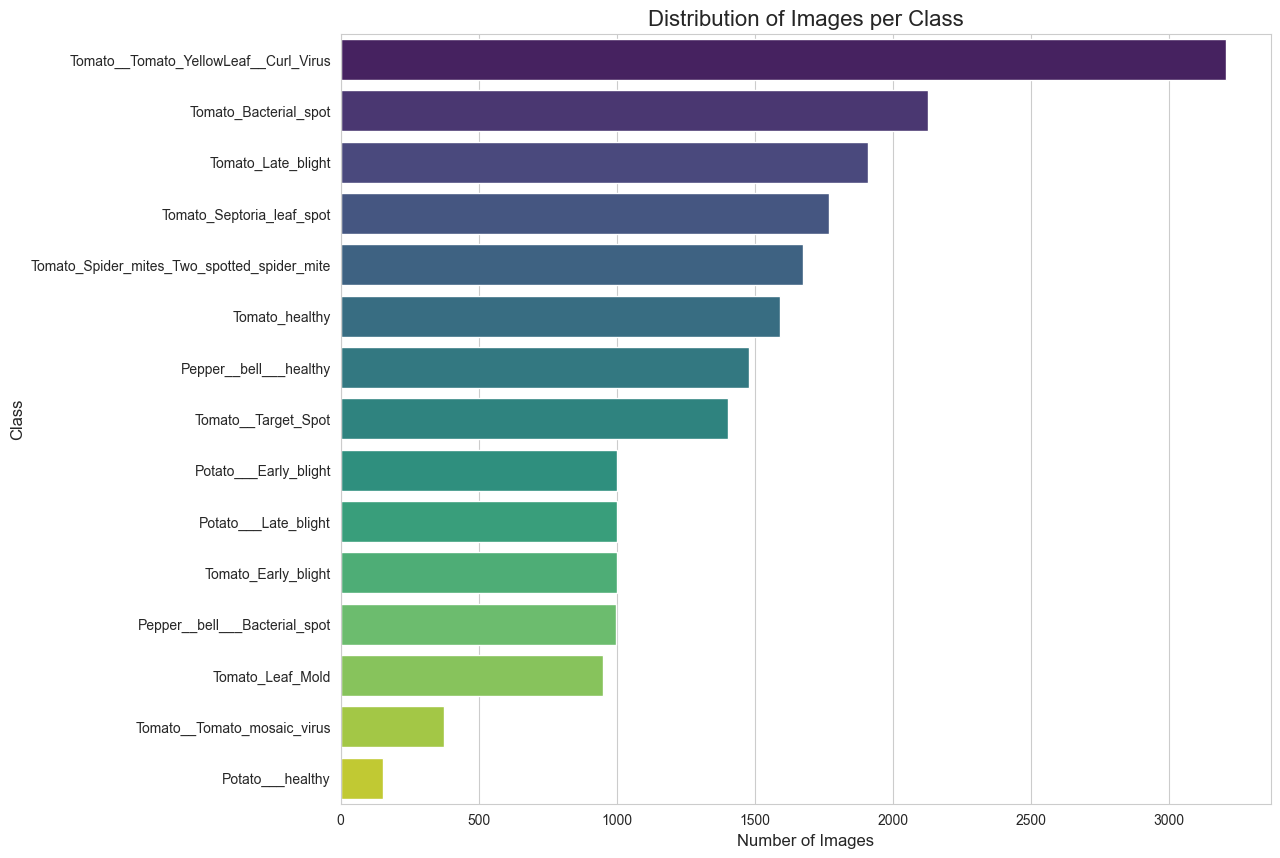

In [4]:
#4
plt.figure(figsize=(12, 10))
sns.barplot(x='Count', y='Class', data=df_dist, palette='viridis')
plt.title('Distribution of Images per Class', fontsize=16)
plt.xlabel('Number of Images', fontsize=12)
plt.ylabel('Class', fontsize=12)
plt.show()

# 基於上面的圖表，我們可以在報告中下結論：
# "資料集在類別間存在一定程度的不平衡，例如 X 類的樣本數遠多於 Y 類。
# 這可能導致模型偏向於多數類，因此在後續實驗中引入 Focal Loss 等策略是必要的。"

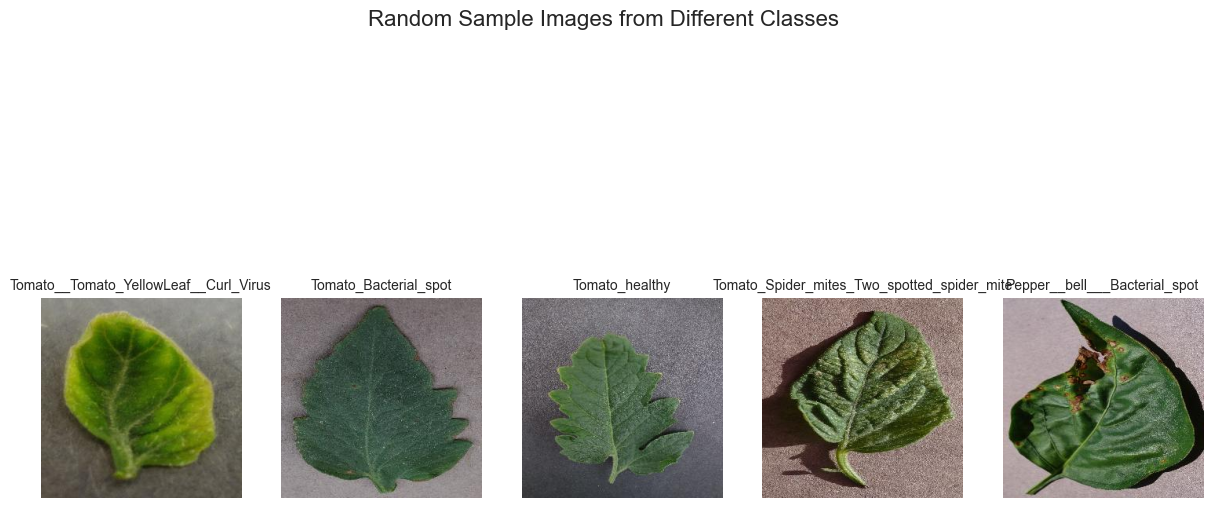

In [5]:
#5
def display_random_images(data_dir, class_names, num_samples=5):
    plt.figure(figsize=(15, 8))
    
    # 隨機選取幾個類別
    random_classes = random.sample(class_names, num_samples)
    
    for i, class_name in enumerate(random_classes):
        # 取得該類別的所有圖片路徑
        class_path = os.path.join(data_dir, class_name)
        image_files = os.listdir(class_path)
        
        # 隨機選取一張圖片
        random_image_file = random.choice(image_files)
        image_path = os.path.join(class_path, random_image_file)
        
        # 讀取並顯示圖片
        img = cv2.imread(image_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # 將 BGR 轉為 RGB
        
        plt.subplot(1, num_samples, i + 1)
        plt.imshow(img)
        plt.title(class_name, fontsize=10)
        plt.axis('off')
        
    plt.suptitle('Random Sample Images from Different Classes', fontsize=16)
    plt.show()

# 執行函式來顯示圖片
display_random_images(data_dir, class_names)


In [7]:
#6 # 重新整理所有有效的類別名稱，排除 'PlantVillage'
valid_class_names = [name for name in class_names if name != 'PlantVillage']
num_valid_classes = len(valid_class_names)
print(f"過濾後，總共有 {num_valid_classes} 個有效類別。")

# 建立包含所有圖片路徑和對應標籤的列表
filepaths = []
labels = []

# 定義可接受的圖片副檔名
image_extensions = {'.jpg', '.jpeg', '.png', '.bmp'}

for class_name in valid_class_names:
    class_path = os.path.join(data_dir, class_name)
    image_files = os.listdir(class_path)
    for img in image_files:
        # *** 核心修正點：只加入副檔名正確的檔案 ***
        if img.lower().endswith(tuple(image_extensions)):
            filepaths.append(os.path.join(class_path, img))
            labels.append(class_name)

# 將路徑和標籤轉換為 Pandas DataFrame，方便後續處理
df = pd.DataFrame({
    'filepath': filepaths,
    'label': labels
})

# 打亂資料順序，這是一個好習慣
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

print(f"\n成功載入 {len(df)} 張圖片的路徑與標籤。")
print("DataFrame 範例：")
df.head()

過濾後，總共有 15 個有效類別。

成功載入 20638 張圖片的路徑與標籤。
DataFrame 範例：


,filepath,label
0,PlantVillage\Tomato_Spider_mites_Two_spotted_s...,Tomato_Spider_mites_Two_spotted_spider_mite
1,PlantVillage\Potato___Early_blight\900514b4-87...,Potato___Early_blight
2,PlantVillage\Tomato_Late_blight\edec546b-3d6b-...,Tomato_Late_blight
3,PlantVillage\Tomato__Tomato_YellowLeaf__Curl_V...,Tomato__Tomato_YellowLeaf__Curl_Virus
4,PlantVillage\Tomato_Spider_mites_Two_spotted_s...,Tomato_Spider_mites_Two_spotted_spider_mite


In [8]:
#7
from sklearn.model_selection import train_test_split

# 我們需要將標籤（字串）轉換為數字，才能進行分層抽樣
# 同時也為後續模型訓練做好準備
df['label_idx'] = df['label'].astype('category').cat.codes

# 準備切分的資料：X 是特徵（這裡用檔案路徑代表），y 是目標（數字標籤）
X = df['filepath']
y = df['label_idx']

# 執行第一次切分：分出 80% 的 train_val_set 和 20% 的 test_set
# stratify=y 確保了分層抽樣
X_train_val, X_test, y_train_val, y_test = train_test_split(
    X, y, 
    test_size=0.2,       # 20% 作為最終測試集
    random_state=42, 
    stratify=y
)

print(f"訓練驗證集 (Train/Val Set) 大小：{len(X_train_val)} 筆資料")
print(f"最終測試集 (Hold-out Test Set) 大小：{len(X_test)} 筆資料")

訓練驗證集 (Train/Val Set) 大小：16510 筆資料
最終測試集 (Hold-out Test Set) 大小：4128 筆資料


In [9]:
#8
print("原始資料集類別分佈比例：")
print(df['label'].value_counts(normalize=True).head())

print("\n訓練驗證集類別分佈比例：")
# 需要將 y_train_val (數字標籤) 轉回原始的文字標籤來查看
train_val_labels = df['label'][y_train_val.index]
print(train_val_labels.value_counts(normalize=True).head())

print("\n最終測試集類別分佈比例：")
test_labels = df['label'][y_test.index]
print(test_labels.value_counts(normalize=True).head())

# 可以看到，三個資料集的類別比例幾乎完全相同，證明分層抽樣成功！

原始資料集類別分佈比例：
label
Tomato__Tomato_YellowLeaf__Curl_Virus          0.155441
Tomato_Bacterial_spot                          0.103062
Tomato_Late_blight                             0.092499
Tomato_Septoria_leaf_spot                      0.085813
Tomato_Spider_mites_Two_spotted_spider_mite    0.081209
Name: proportion, dtype: float64

訓練驗證集類別分佈比例：
label
Tomato__Tomato_YellowLeaf__Curl_Virus          0.155421
Tomato_Bacterial_spot                          0.103028
Tomato_Late_blight                             0.092489
Tomato_Septoria_leaf_spot                      0.085827
Tomato_Spider_mites_Two_spotted_spider_mite    0.081224
Name: proportion, dtype: float64

最終測試集類別分佈比例：
label
Tomato__Tomato_YellowLeaf__Curl_Virus          0.155523
Tomato_Bacterial_spot                          0.103198
Tomato_Late_blight                             0.092539
Tomato_Septoria_leaf_spot                      0.085756
Tomato_Spider_mites_Two_spotted_spider_mite    0.081153
Name: proportion, dtype: float64


In [10]:
#9 # 將資料整合回 DataFrame 並儲存
train_val_df = pd.DataFrame({
    'filepath': X_train_val,
    'label_idx': y_train_val
})

test_df = pd.DataFrame({
    'filepath': X_test,
    'label_idx': y_test
})

# 儲存 label 到 index 的對應關係，未來預測時需要
label_mapping = dict(enumerate(df['label'].astype('category').cat.categories))
import json
with open('label_mapping.json', 'w') as f:
    json.dump(label_mapping, f)


train_val_df.to_csv('train_val_set.csv', index=False)
test_df.to_csv('test_set.csv', index=False)

print("\n資料切分完成！已將 train_val_set.csv 和 test_set.csv 儲存至專案目錄。")
print("同時儲存了 label_mapping.json 檔案。")


資料切分完成！已將 train_val_set.csv 和 test_set.csv 儲存至專案目錄。
同時儲存了 label_mapping.json 檔案。
